**Run the following two cells before you begin.**

In [22]:
%autosave 10

Autosaving every 10 seconds


In [23]:
import pandas as pd
import numpy as np

______________________________________________________________________
**First, import your data set and define the sigmoid function.**
<details>
    <summary>Hint:</summary>
    The definition of the sigmoid is $f(x) = \frac{1}{1 + e^{-X}}$.
</details>

In [24]:
# Import the data set
data=pd.read_csv('cleaned_data.csv')


In [25]:
# Define the sigmoid function
def sigmoid(x):
    sig=1/(1+np.exp(-x))
    return sig

**Now, create a train/test split (80/20) with `PAY_1` and `LIMIT_BAL` as features and `default payment next month` as values. Use a random state of 24.**

In [26]:
# Create a train/test split
from sklearn.model_selection import train_test_split
X = data[['PAY_1','LIMIT_BAL']]
y = data['default payment next month']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=24)

______________________________________________________________________
**Next, import LogisticRegression, with the default options, but set the solver to `'liblinear'`.**

In [27]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver="liblinear")

______________________________________________________________________
**Now, train on the training data and obtain predicted classes, as well as class probabilities, using the testing data.**

In [28]:
# Fit the logistic regression model on training data
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
# Make predictions using `.predict()`
y_preds = model.predict(X_test)
y_preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
# Find class probabilities using `.predict_proba()`
y_probs = model.predict_proba(X_test)
y_probs

array([[0.74826924, 0.25173076],
       [0.584297  , 0.415703  ],
       [0.79604453, 0.20395547],
       ...,
       [0.584297  , 0.415703  ],
       [0.82721498, 0.17278502],
       [0.66393435, 0.33606565]])

______________________________________________________________________
**Then, pull out the coefficients and intercept from the trained model and manually calculate predicted probabilities. You'll need to add a column of 1s to your features, to multiply by the intercept.**

In [32]:
# Add column of 1s to features
'''
X_train = X_train.assign(col1=1) 
X_test = X_test.assign(col1=1) 
X_train.head(),X_test.head()
'''

'\nX_train = X_train.assign(col1=1) \nX_test = X_test.assign(col1=1) \nX_train.head(),X_test.head()\n'

In [33]:
# Get coefficients and intercepts from trained model
w = (model.coef_)
b = model.intercept_

In [34]:
# Manually calculate predicted probabilities
def predict(w, b, X):
    pred = []
    z = np.dot(w,X)
    a = sigmoid(z)
    for i in range(0,len(a[0])):
        if (a[0][i] > 0.5): 
            pred.append(1)
        elif (a[0][i] <= 0.5):
            pred.append(0)
    return (pred),a

______________________________________________________________________
**Next, using a threshold of `0.5`, manually calculate predicted classes. Compare this to the class predictions output by scikit-learn.**

In [35]:
# Manually calculate predicted classes
Y_prediction_test, Y_proba_test = predict(w, b, X_test.T)
print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - y_test)) * 100))

test accuracy: 78.34239639977498 %


In [36]:
# Compare to scikit-learn's predicted classes
y_prediction_test = model.predict(X_test)
print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

test accuracy: 78.34239639977498 %


______________________________________________________________________
**Finally, calculate ROC AUC using both scikit-learn's predicted probabilities, and your manually predicted probabilities, and compare.**

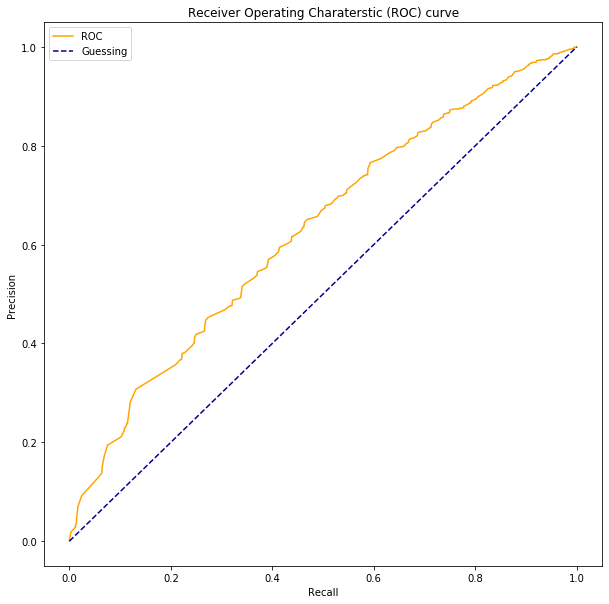

ROC AUC Score percentage:62.72%


In [37]:
# Use scikit-learn's predicted probabilities to calculate ROC AUC
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline
precision, recall, threshold = roc_curve(y_test, y_probs[:,1])
plt.figure(figsize = (10,10))
plt.plot(precision,recall,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='Guessing') # Baseline
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Receiver Operating Charaterstic (ROC) curve")
plt.legend()
plt.show()
print(f"ROC AUC Score percentage:{roc_auc_score(y_test,y_probs[:,1])*100:.02f}%")


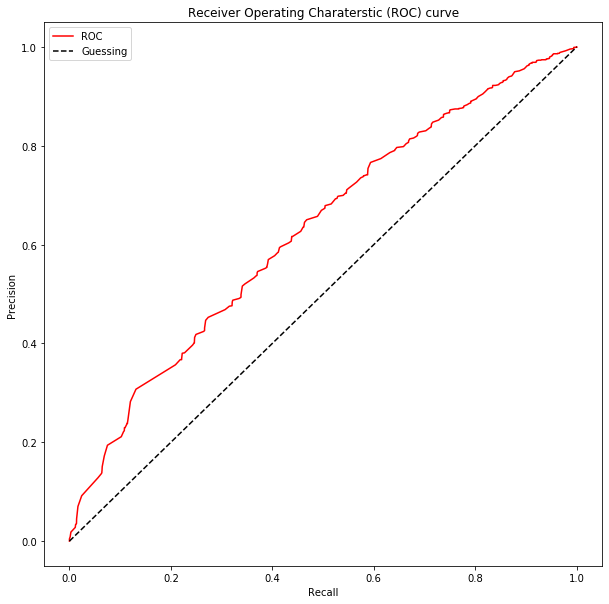

ROC AUC Score percentage:62.72%


In [38]:
# Use manually calculated predicted probabilities to calculate ROC AUC
precision, recall, threshold = roc_curve(y_test, Y_proba_test.reshape(5333,1))
plt.figure(figsize = (10,10))
plt.plot(precision,recall,color='red',label='ROC')
plt.plot([0,1],[0,1],color='black',linestyle='--',label='Guessing') # Baseline
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Receiver Operating Charaterstic (ROC) curve")
plt.legend()
plt.show()
print(f"ROC AUC Score percentage:{roc_auc_score(y_test,Y_proba_test.reshape(5333,1))*100:.02f}%")